## Travelling Salesman Problem (TSP)

The **Travelling Salesman Problem (TSP)** is a classic combinatorial optimization problem where the goal is to find the shortest possible route that visits each city exactly once and returns to the starting city.

### Definition:
Given:
- A set of \( n \) cities, represented as nodes in a graph \( G = (V, E) \),
- A distance (or weight) \( d_{uv} \) between each pair of cities \( u \) and \( v \),

The objective is to determine the order of visiting the cities such that:
1. Each city is visited exactly once,
2. The total travel distance is minimized,
3. The tour ends at the starting city.


The TSP is **NP-hard**, meaning that solving it exactly for a large number of cities is computationally infeasible. Heuristic and approximation algorithms (e.g., genetic algorithms, simulated annealing, quantum optimization methods) are often used to find near-optimal solutions efficiently.

## References
[1] Solve utility-scale quantum optimization problems:  
[qiskit QAOA](https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm)

## Small distance TSP

array([[0, 5, 7],
       [5, 0, 2],
       [7, 2, 0]])

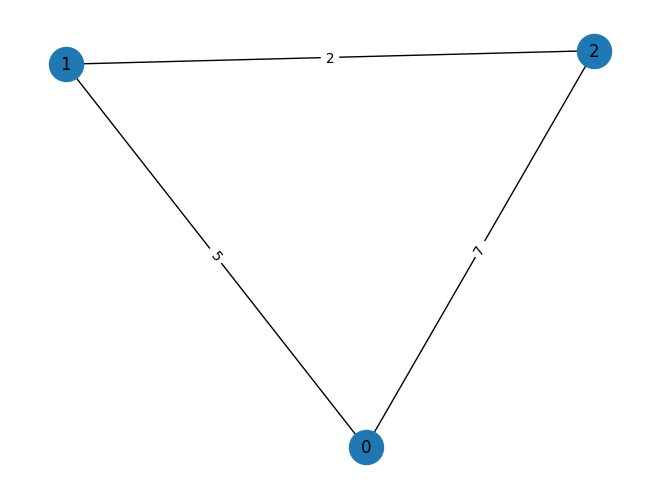

In [13]:
from TSP.tsp import Tsp, bruteforce

tsp = Tsp(3, 1) 
tsp.weight_matrix

## Encode to QUBO

### Amplify QUBO

In [14]:
qubo = tsp.qubo(solver="Amplify", penalty=15)
qubo['model'].to_unconstrained_poly()
# qubo["obj"] 

Poly(30 q_{0,0} q_{0,1} + 30 q_{0,0} q_{0,2} + 30 q_{0,0} q_{1,0} + 5 q_{0,0} q_{1,1} + 5 q_{0,0} q_{1,2} + 30 q_{0,0} q_{2,0} + 7 q_{0,0} q_{2,1} + 7 q_{0,0} q_{2,2} + 30 q_{0,1} q_{0,2} + 5 q_{0,1} q_{1,0} + 30 q_{0,1} q_{1,1} + 5 q_{0,1} q_{1,2} + 7 q_{0,1} q_{2,0} + 30 q_{0,1} q_{2,1} + 7 q_{0,1} q_{2,2} + 5 q_{0,2} q_{1,0} + 5 q_{0,2} q_{1,1} + 30 q_{0,2} q_{1,2} + 7 q_{0,2} q_{2,0} + 7 q_{0,2} q_{2,1} + 30 q_{0,2} q_{2,2} + 30 q_{1,0} q_{1,1} + 30 q_{1,0} q_{1,2} + 30 q_{1,0} q_{2,0} + 2 q_{1,0} q_{2,1} + 2 q_{1,0} q_{2,2} + 30 q_{1,1} q_{1,2} + 2 q_{1,1} q_{2,0} + 30 q_{1,1} q_{2,1} + 2 q_{1,1} q_{2,2} + 2 q_{1,2} q_{2,0} + 2 q_{1,2} q_{2,1} + 30 q_{1,2} q_{2,2} + 30 q_{2,0} q_{2,1} + 30 q_{2,0} q_{2,2} + 30 q_{2,1} q_{2,2} - 30 q_{0,0} - 30 q_{0,1} - 30 q_{0,2} - 30 q_{1,0} - 30 q_{1,1} - 30 q_{1,2} - 30 q_{2,0} - 30 q_{2,1} - 30 q_{2,2} + 90)

### Qiskit QUBO

In [15]:
qubo = tsp.qubo("Qiskit", penalty=17)
# cost_hamiltonian, offset = qubo['model'], qubo['offset']

# print(cost_hamiltonian, f"{offset=}", sep='\n')
from utils.utils import formula_to_latex

display(formula_to_latex(str(qubo["qubo"])))

cost_hamiltonian, offset = qubo['model'], qubo['offset']



<IPython.core.display.Math object>

In [16]:
print(cost_hamiltonian)

SparsePauliOp(['IIIIIIIIZ', 'IIIIIIIZI', 'IIIIIIZII', 'IIIIIZIII', 'IIIIZIIII', 'IIIZIIIII', 'IIZIIIIII', 'IZIIIIIII', 'ZIIIIIIII', 'IIIIIIIZZ', 'IIIIIIZIZ', 'IIIIIZIIZ', 'IIIIZIIIZ', 'IIZIIIIIZ', 'IZIIIIIIZ', 'IIIIIIZZI', 'IIIIIZIZI', 'IIIIZIIZI', 'IIIZIIIZI', 'IIZIIIIZI', 'IZIIIIIZI', 'ZIIIIIIZI', 'IIIIZIZII', 'IIIZIIZII', 'IZIIIIZII', 'ZIIIIIZII', 'IIIIZZIII', 'IIIZIZIII', 'IIZIIZIII', 'IZIIIZIII', 'IIIZZIIII', 'IIZIZIIII', 'IZIIZIIII', 'ZIIIZIIII', 'IZIZIIIII', 'ZIIZIIIII', 'IZZIIIIII', 'ZIZIIIIII', 'ZZIIIIIII'],
              coeffs=[-20.  +0.j, -23.  +0.j, -20.  +0.j, -18.75+0.j, -20.5 +0.j, -18.75+0.j,
 -19.25+0.j, -21.5 +0.j, -19.25+0.j,   8.5 +0.j,   8.5 +0.j,   8.5 +0.j,
   1.25+0.j,   8.5 +0.j,   1.75+0.j,   8.5 +0.j,   1.25+0.j,   8.5 +0.j,
   1.25+0.j,   1.75+0.j,   8.5 +0.j,   1.75+0.j,   1.25+0.j,   8.5 +0.j,
   1.75+0.j,   8.5 +0.j,   8.5 +0.j,   8.5 +0.j,   8.5 +0.j,   0.5 +0.j,
   8.5 +0.j,   0.5 +0.j,   8.5 +0.j,   0.5 +0.j,   0.5 +0.j,   8.5 +0.j,
   8.5 +0.j,   8.5

## Bruteforce

In [17]:
bruteforce(tsp.weight_matrix)

(np.int64(14), (0, 1, 2), 0.0)

## Solve locally

In [18]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeKyiv


backend = FakeKyiv()
# print(backend)

# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=backend)


reps = 2
circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=reps)
candidate_circuit = pm.run(circuit)
print(candidate_circuit.parameters)

# candidate_circuit.draw('mpl')

ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(γ[0]), ParameterVectorElement(γ[1])])


## Optimize Circuit

In [ ]:
from utils import QAOA
from scipy.optimize import minimize
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from utils.utils import validate_bounds



estimator = Estimator(backend)
qaoa = QAOA(candidate_circuit, reps=reps)


bounds = validate_bounds(candidate_circuit)

result = minimize(
    qaoa.cost_func_estimator,
    qaoa.init_params,
    args=(cost_hamiltonian, estimator),
    method="COBYLA",
    tol=100
    bounds=bounds
)

print(result)
cost = qaoa.draw_cost_function()
print(cost)

In [10]:
optimized_circuit = circuit.assign_parameters(result.x)
optimized_circuit.measure_all()
# optimized_circuit.draw('mpl', fold=False, idle_wires=False)

## Run sampling

In [ ]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler(default_shots=10000)

pub= (optimized_circuit, )
job = sampler.run([pub], shots=int(1e4))
result = job.result()

most_likely_bitstring = tsp.interpret(result, "Qiskit", True)
print("Result bitstring:", most_likely_bitstring)

distribution: 
 {280: 0.0008, 102: 0.0007, 229: 0.0011, 255: 0.0044, 113: 0.0036, 413: 0.0123, 246: 0.0045, 459: 0.0043, 224: 0.0007, 333: 0.0031, 504: 0.0082, 379: 0.0053, 260: 0.0004, 492: 0.0021, 483: 0.0015, 422: 0.0013, 165: 0.0008, 457: 0.0019, 427: 0.0083, 47: 0.0013, 241: 0.0041, 238: 0.007, 505: 0.0009, 9: 0.002, 357: 0.0032, 368: 0.0008, 382: 0.0055, 509: 0.0038, 268: 0.0006, 92: 0.0023, 45: 0.0069, 58: 0.0089, 327: 0.0035, 315: 0.0007, 91: 0.0031, 212: 0.0007, 320: 0.0031, 2: 0.0116, 264: 0.0021, 477: 0.0056, 411: 0.0054, 149: 0.0028, 110: 0.0035, 7: 0.0155, 56: 0.0141, 136: 0.0008, 309: 0.0003, 79: 0.0056, 227: 0.0056, 48: 0.0027, 186: 0.0053, 330: 0.0009, 439: 0.0059, 471: 0.0051, 73: 0.0097, 292: 0.0102, 1: 0.0057, 367: 0.0079, 251: 0.0038, 176: 0.0019, 435: 0.0013, 190: 0.0004, 404: 0.0017, 223: 0.0047, 307: 0.0054, 128: 0.0017, 209: 0.0008, 358: 0.0014, 454: 0.0047, 405: 0.0061, 5: 0.0054, 374: 0.0012, 500: 0.005, 426: 0.0027, 494: 0.0044, 213: 0.0067, 34: 0.0014, 316: 

bitstring: [0. 0. 0.], probability: 0.0155
bitstring: [1. 1. 1.], probability: 0.0141
bitstring: [2. 2. 1.], probability: 0.0135
bitstring: [1. 2. 2.], probability: 0.0123
bitstring: [0. 0. 0.], probability: 0.0116
bitstring: [0. 2. 2.], probability: 0.0104
bitstring: [0. 0. 2.], probability: 0.0102
bitstring: [0. 2. 0.], probability: 0.0101
bitstring: [2. 0. 0.], probability: 0.0097
bitstring: [1. 1. 1.], probability: 0.0089
bitstring: [2. 2. 0.], probability: 0.0086
bitstring: [2. 2. 2.], probability: 0.0085
bitstring: [1. 2. 2.], probability: 0.0083
bitstring: [2. 2. 2.], probability: 0.0082
bitstring: [0. 0. 0.], probability: 0.0081
bitstring: [2. 0. 2.], probability: 0.0079
bitstring: [2. 1. 2.], probability: 0.0075
bitstring: [2. 2. 1.], probability: 0.007
bitstring: [1. 0. 1.], probability: 0.0069
bitstring: [2. 0. 2.], probability: 0.0068
bitstring: [2. 2. 0.], probability: 0.0067
bitstring: [0. 0. 2.], probability: 0.0063
bitstring: [0. 2. 2.], probability: 0.0061
bitstring: [

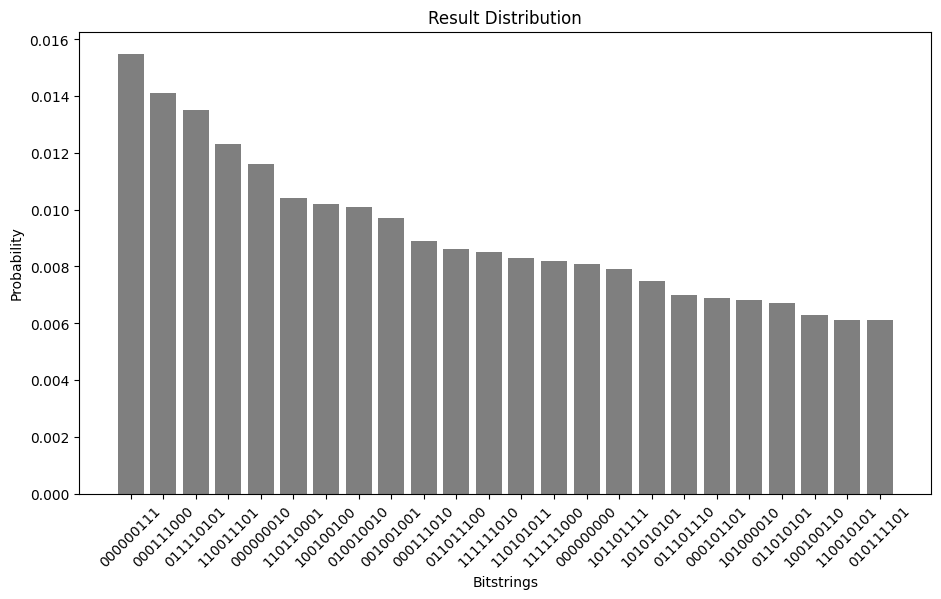

In [ ]:
tsp.plot_distribution(24)

In [12]:
cost = 0
most_likely_bitstring = [3,1,0,2]
for a, b in zip(most_likely_bitstring, list(most_likely_bitstring)[1:] + [most_likely_bitstring[0]]):
   cost += tsp.weight_matrix[int(a)][int(b)]
print("Cost:", cost)

Cost: 24
